# <center>Partie II - Exploration de données du système Ford GoBike</center>
## <center>Par Medi Vankembo</center>

## Aperçu de l'enquête


Ford GoBike est un système de données qui comprend des informations sur les trajets individuels effectués dans un système de partage de vélos. Avec environ 20 000 vélos et plus de 1 300 stations, Il a été conçu pour les déplacements rapides et pratiques, et constitue un moyen amusant et abordable de se déplacer en ville.

Sur ce, notre étude a porté sur les durées de courses.

Nous avons voulu donc comprendre comment les autres caractéristiques ont une influence sur ces durées.

## Vue d'ensemble des données

Pour cette analyse, les données récoltées ont concernées les courses enregistrées au mois de Février 2019, et constituées de 183412 enregistrements et 16 colonnes relatives aux durée de trajets parcourus, au stations de départ et d'arrivée(coordonnées géographiques, nom, id), aux vélo(type de velo, id), et aux utilisateurs(Date de naissance, sexe,...).


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load data from csv file and display some firsts rows
go_bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')
go_bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Make copies of original pieces of data before any manipulation
ford_go_bike = go_bike_data.copy()

In [4]:
# Delete columns
ford_go_bike.dropna(inplace=True)

# Check the result
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [5]:
print('La somme de lignes dupliquées =', ford_go_bike.duplicated().sum())

La somme de lignes dupliquées = 0


In [6]:
# Convert object dtype to datetime dtype for the columns which contain date
ford_go_bike.start_time = pd.to_datetime(ford_go_bike.start_time)
ford_go_bike.end_time = pd.to_datetime(ford_go_bike.end_time)

# Check the result
print("start_time :", ford_go_bike.dtypes.start_time)
print("end_time :",ford_go_bike.dtypes.end_time)

start_time : datetime64[ns]
end_time : datetime64[ns]


In [7]:
# Convert float64 dtype to int64 dtype for the column member_birth_year
ford_go_bike['member_birth_year'] = ford_go_bike['member_birth_year'].astype('int')
# Check the result
print("member_birth_year :", ford_go_bike.dtypes.member_birth_year)

member_birth_year : int64


In [8]:
# Convert float64 dtype to int64 dtype for the column start_station_id and end_station_id
ford_go_bike['start_station_id'] = ford_go_bike['start_station_id'].astype('int')
ford_go_bike['end_station_id'] = ford_go_bike['end_station_id'].astype('int')

# Check the result
print("start_station_id :", ford_go_bike.dtypes.member_birth_year)
print("end_station_id :", ford_go_bike.dtypes.member_birth_year)

start_station_id : int64
end_station_id : int64


In [9]:
# Convert object dtype to boolean dtype for the bike_share_for_all_trip column
ford_go_bike.bike_share_for_all_trip = ford_go_bike.bike_share_for_all_trip.map({'Yes' : True, 'No':False})

# Check the result
print("bike_share_for_all_trip :", ford_go_bike.dtypes.bike_share_for_all_trip)
ford_go_bike.head()

bike_share_for_all_trip : bool


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,False


In [10]:
# Create the start stations dataframe
start_stations = ford_go_bike[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude']]

# Rename columns of start stations dataframe
start_stations.columns = ['id', 'name', 'latitude', 'longitude']
start_stations.head()

,id,name,latitude,longitude
0,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811
2,86,Market St at Dolores St,37.769305,-122.426826
3,375,Grove St at Masonic Ave,37.774836,-122.446546
4,7,Frank H Ogawa Plaza,37.804562,-122.271738
5,93,4th St at Mission Bay Blvd S,37.770407,-122.391198


In [11]:
# Create the end stations dataframe
end_stations = ford_go_bike[['end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']]

# Rename columns of end stations dataframe
end_stations.columns = ['id', 'name', 'latitude', 'longitude']
end_stations.head()

,id,name,latitude,longitude
0,13,Commercial St at Montgomery St,37.794231,-122.402923
2,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904
3,70,Central Ave at Fell St,37.773311,-122.444293
4,222,10th Ave at E 15th St,37.792714,-122.248780
5,323,Broadway at Kearny,37.798014,-122.405950


In [12]:
# Get start stations info
print(start_stations.info())
print("_______________________________________________________")

# Get start stations info
print(end_stations.info())
print("_______________________________________________________")

# Merge the two dataframe
all_stations = pd.concat([start_stations,end_stations])

# Get all stations info
print(all_stations.info())
all_stations.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         174952 non-null  int64  
 1   name       174952 non-null  object 
 2   latitude   174952 non-null  float64
 3   longitude  174952 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.7+ MB
None
_______________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         174952 non-null  int64  
 1   name       174952 non-null  object 
 2   latitude   174952 non-null  float64
 3   longitude  174952 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.7+ MB
None
_______________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int6

,id,name,latitude,longitude
0,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811
2,86,Market St at Dolores St,37.769305,-122.426826
3,375,Grove St at Masonic Ave,37.774836,-122.446546
4,7,Frank H Ogawa Plaza,37.804562,-122.271738
5,93,4th St at Mission Bay Blvd S,37.770407,-122.391198


In [13]:
# Remove duplicated values
all_stations.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)
print(all_stations.info())
all_stations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         329 non-null    int64  
 1   name       329 non-null    object 
 2   latitude   329 non-null    float64
 3   longitude  329 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.4+ KB
None


,id,name,latitude,longitude
0,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811
1,86,Market St at Dolores St,37.769305,-122.426826
2,375,Grove St at Masonic Ave,37.774836,-122.446546
3,7,Frank H Ogawa Plaza,37.804562,-122.271738
4,93,4th St at Mission Bay Blvd S,37.770407,-122.391198


In [14]:
# Delete columns
ford_go_bike.drop('start_station_name', inplace=True, axis=1)
ford_go_bike.drop('start_station_latitude', inplace=True, axis=1)
ford_go_bike.drop('start_station_longitude', inplace=True, axis=1)
ford_go_bike.drop('end_station_name', inplace=True, axis=1)
ford_go_bike.drop('end_station_latitude', inplace=True, axis=1)
ford_go_bike.drop('end_station_longitude', inplace=True, axis=1)

# Check the result
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   end_station_id           174952 non-null  int64         
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  int64         
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(5), object(2)
memory usage: 13.5+ MB


In [15]:
# Get weekday, day, hour and minute from start_time
ford_go_bike['start_weekday'] = ford_go_bike['start_time'].dt.day_name()
ford_go_bike['start_day'] = ford_go_bike['start_time'].dt.day
ford_go_bike['start_month'] = ford_go_bike['start_time'].dt.month
ford_go_bike['start_hour'] = ford_go_bike['start_time'].dt.hour
ford_go_bike['start_minute'] = ford_go_bike['start_time'].dt.minute

# Get weekday, day, hour and minute from end_time
ford_go_bike['end_weekday'] = ford_go_bike['end_time'].dt.day_name()
ford_go_bike['end_day'] = ford_go_bike['end_time'].dt.day
ford_go_bike['end_month'] = ford_go_bike['end_time'].dt.month
ford_go_bike['end_hour'] = ford_go_bike['end_time'].dt.hour
ford_go_bike['end_minute'] = ford_go_bike['end_time'].dt.minute

# Check result
ford_go_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_weekday,start_day,start_month,start_hour,start_minute,end_weekday,end_day,end_month,end_hour,end_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,False,Thursday,28,2,17,32,Friday,1,3,8,1
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,False,Thursday,28,2,12,13,Friday,1,3,5,24
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,False,Thursday,28,2,17,54,Friday,1,3,4,2
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,4898,Subscriber,1974,Male,True,Thursday,28,2,23,54,Friday,1,3,0,20
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,323,5200,Subscriber,1959,Male,False,Thursday,28,2,23,49,Friday,1,3,0,19
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,312,3803,Subscriber,1983,Female,False,Thursday,28,2,23,55,Friday,1,3,0,14
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,127,6329,Subscriber,1989,Male,False,Thursday,28,2,23,41,Friday,1,3,0,8
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,127,6548,Subscriber,1988,Other,False,Thursday,28,2,23,41,Friday,1,3,0,7
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,121,6488,Subscriber,1992,Male,False,Thursday,28,2,23,49,Friday,1,3,0,7
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,43,5318,Subscriber,1996,Female,True,Thursday,28,2,23,57,Friday,1,3,0,5


In [16]:
# Setup the default color
sb.set_palette("pastel")
base_color = sb.color_palette()[0]

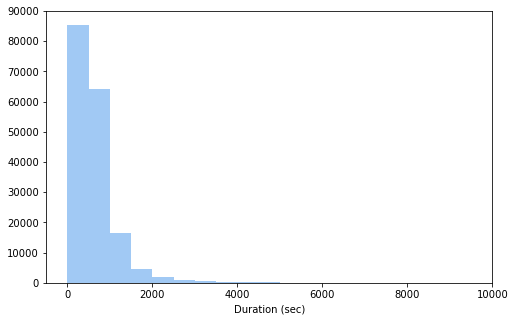

In [17]:
binsize = 500
max_duration = ford_go_bike['duration_sec'].max()
bins = np.arange(0, max_duration + binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(ford_go_bike.duration_sec, bins = bins)
plt.xlabel('Duration (sec)')
plt.axis([-500, 10000, 0, 90000])
plt.show()

Cette visualisation nous montre que la majeure de courses ont une durées entre 0 - 2000 secondes.

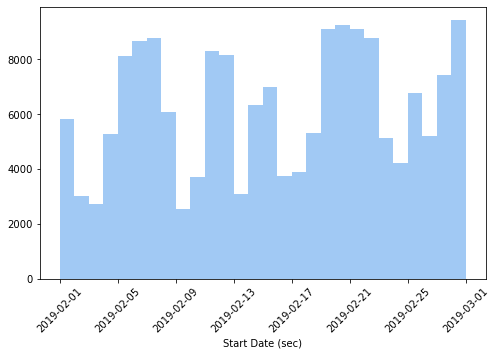

In [18]:
plt.figure(figsize=[8, 5])
plt.hist(ford_go_bike.start_time, bins = 28)
plt.xlabel('Start Date (sec)')
plt.xticks(rotation=45)
plt.show()

Cette visualisation ne nous donne pas assez d'informations pertinentes. D'où, nous allons creuser en profondeur en analysant les données extraites.

Que nous révèle la distribution sur les jours de la semaine ?


In [19]:
# Get the sum of each value for the start_weekday column
weekday_values = ford_go_bike.start_weekday.value_counts()

# Get the unique values of the column weekday in desc frequences order 
weekday_values_order = weekday_values.index
weekday_values_order

Index(['Thursday', 'Tuesday', 'Wednesday', 'Friday', 'Monday', 'Sunday',
       'Saturday'],
      dtype='object')

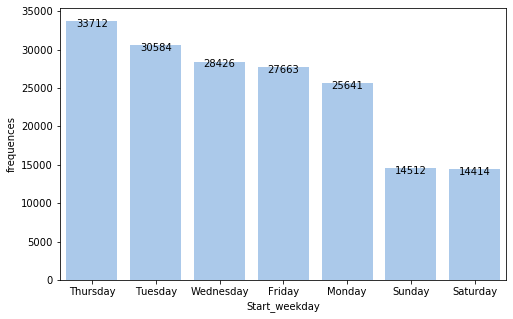

In [20]:
# Plot the distribution
plt.figure(figsize=[8, 5])
sb.barplot(weekday_values.index.values, weekday_values, color=base_color, order=weekday_values_order)
for i in range (weekday_values.shape[0]):
    count = weekday_values[i]
    plt.text(i, count+300, count, ha = 'center', va='top')
plt.ylabel('frequences')
plt.xlabel('Start_weekday');

Nous voyons bien que les courses sont réalisées beacoup plus le Jeudi et le Mardi, et moins plus le weekend, Samedi et Dimanche.

Que pouvons-nous dire de la distribution des heures des courses ?

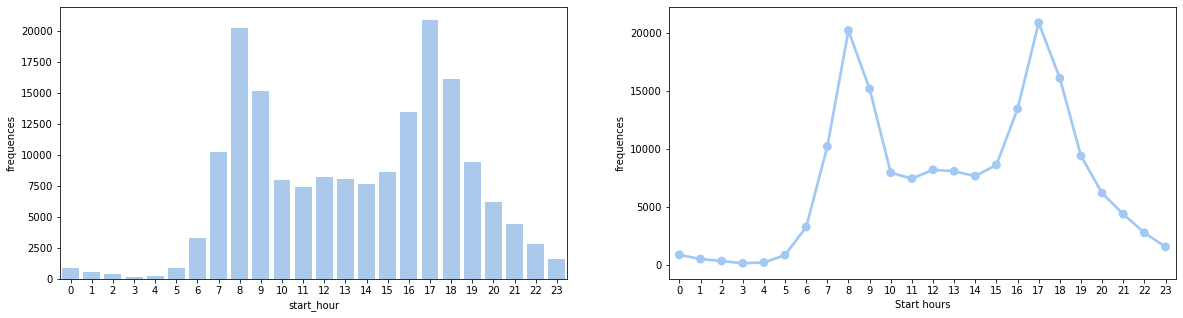

In [21]:
# Get the sum of each value for the start_weekday column
start_hour_values = ford_go_bike.start_hour.value_counts()

# Get the unique values of the column weekday in desc frequences order 
start_hour_values_order = sorted(start_hour_values.index)

# Plot
plt.figure(figsize=([20, 5]))

# First subplot
plt.subplot(1, 2, 1)
sb.barplot(start_hour_values.index.values, start_hour_values, color=base_color, order=start_hour_values_order)
plt.ylabel('frequences')
plt.xlabel('start_hour')

# Second subplot
plt.subplot(1, 2, 2)
start_hour_count=ford_go_bike.groupby('start_hour').size()
sb.pointplot(data = ford_go_bike, x =start_hour_count.index, y=start_hour_count, color=base_color);
plt.ylabel("frequences")
plt.xlabel("Start hours")

plt.show;

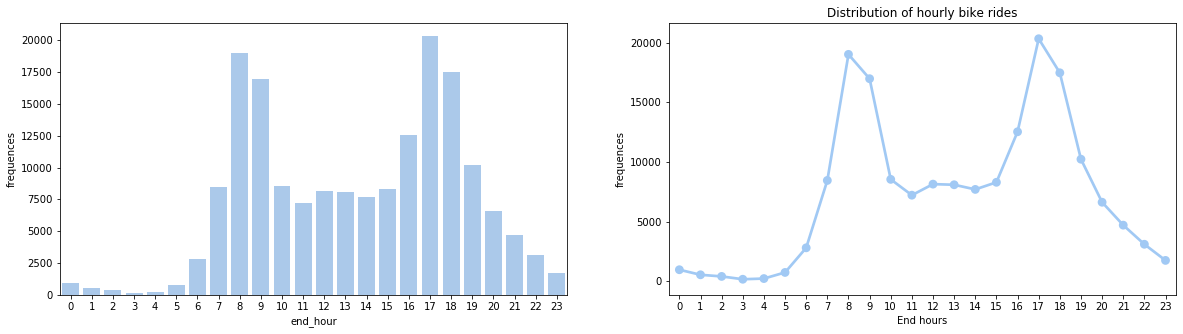

In [22]:
# Plot
plt.figure(figsize=[20, 5])

# First subplot
plt.subplot(1, 2, 1)
end_hour_values = ford_go_bike.end_hour.value_counts()
end_hour_values_order = sorted(end_hour_values.index)
sb.barplot(end_hour_values.index.values, end_hour_values, color=base_color, order=end_hour_values_order)
plt.ylabel('frequences')
plt.xlabel('end_hour')

# Second subplot
plt.subplot(1, 2, 2)
end_hour_count=ford_go_bike.groupby('end_hour').size()
sb.pointplot(data = ford_go_bike, x =end_hour_count.index, y=end_hour_count, color=base_color);
plt.title("Distribution of hourly bike rides");
plt.ylabel("frequences")
plt.xlabel("End hours")

plt.show();

Le constant est le même : Les courses sont de plus en plus effectuées le soir entre 16 et 19 heures et aussi la matinée entre 7 et 10 heures.

Que dire de la distribution de type d'utilisateur ?

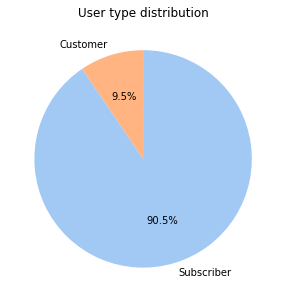

In [23]:
user_type_count = ford_go_bike.user_type.value_counts()
plt.figure(figsize=[10, 5])
plt.pie(user_type_count, labels = user_type_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.title('User type distribution');

Cette distribution nous montre que 9O.5 % d'utilisateurs sont des abonnés, et seulement 9.5% de clients.

Visualisation de la distribution en fonction de l'âge des utilisateurs

In [24]:
# This function takes as parameter the list of user ages, 
# and returns a list of ages of these users

def getUserAges(years):
    ages = []
    for year in years:
        age = 2019 - year
        ages.append(age)
    return ages

ages : Int64Index([ 31,  26,  30,  29,  28,  27,  32,  33,  25,  24,  34,  35,  36,
             39,  37,  23,  38,  40,  22,  21,  41,  42,  45,  20,  44,  43,
             46,  51,  48,  47,  19,  49,  54,  50,  52,  55,  56,  53,  57,
             58,  62,  59,  60,  61,  63,  65,  67,  68,  69,  66,  72,  64,
             74,  70,  88, 119,  71,  18,  76,  77,  86,  73,  80, 117,  78,
            118,  81,  99,  85,  75, 141,  89,  91,  92, 109],
           dtype='int64')


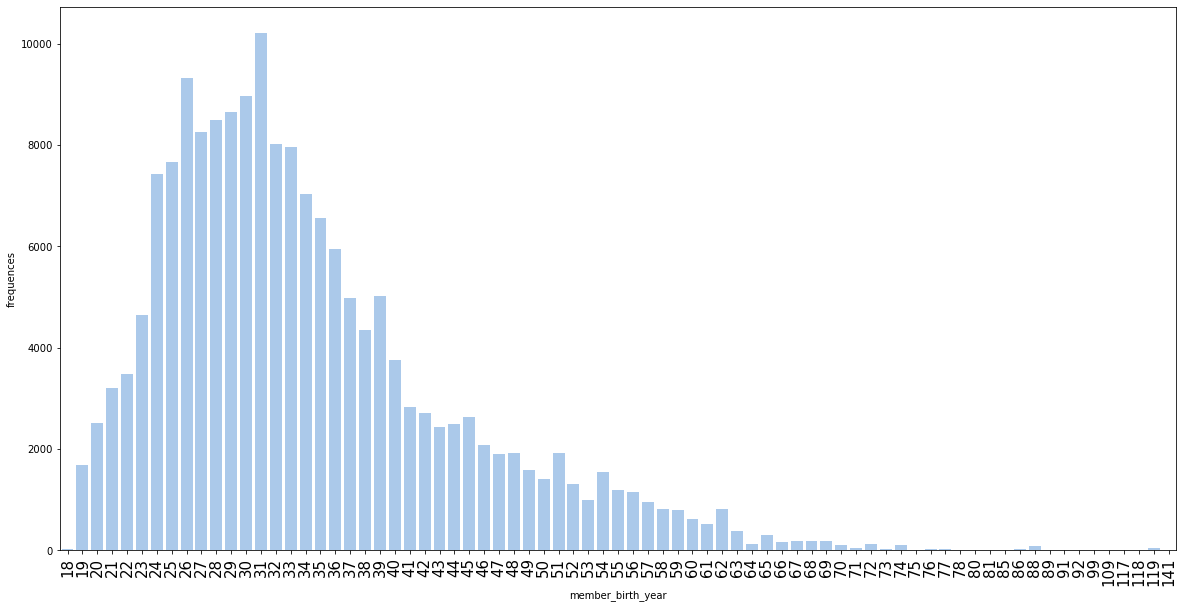

In [25]:
member_birth_year_count = ford_go_bike.member_birth_year.value_counts()
member_birth_year_count.index = getUserAges(member_birth_year_count.index)
print("ages :", member_birth_year_count.index )

# Plot
plt.figure(figsize=[20, 10])
sb.barplot(member_birth_year_count.index.values, member_birth_year_count, color=base_color)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('frequences')
plt.xlabel('member_birth_year');

Cette graphique nous montre que la plus grande tranche d'âge qui qui effectue plus les courses à vélo est entre 17 et 50 ; avec une forte fréquence pour l'âge de 30 ans, suivi de 25 et 29 ans.

Toutefois, nous sommes un peu curieux de voir certains utilisateurs avec un âge très avancé de pratiquer la course à vélo. Nous avons donc réaliser certaines recherches pour savoir jusqu'à quel âge peut-on toujours tratiquer la course à vélo, et nous avons conclu de déterminer l'âge maximum à 80 ans.

In [26]:
# This function returns the age of a user in 2019
def getUserAge(row):
    return (2019 - row.member_birth_year)

In [27]:
# Create a new column : user_age = 2019 - member_birth_year
ford_go_bike['user_age'] = ford_go_bike.apply(lambda row: getUserAge(row), axis=1)

# Check results
ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,...,start_day,start_month,start_hour,start_minute,end_weekday,end_day,end_month,end_hour,end_minute,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,False,...,28,2,17,32,Friday,1,3,8,1,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,False,...,28,2,12,13,Friday,1,3,5,24,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,False,...,28,2,17,54,Friday,1,3,4,2,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,4898,Subscriber,1974,Male,True,...,28,2,23,54,Friday,1,3,0,20,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,323,5200,Subscriber,1959,Male,False,...,28,2,23,49,Friday,1,3,0,19,60


In [28]:
# Filter dataframe by age <= 80
ford_go_bike = ford_go_bike[ford_go_bike['user_age'] <= 80] 

# Check result
ford_go_bike.user_age.unique()

array([35, 47, 30, 45, 60, 36, 31, 27, 23, 26, 29, 38, 44, 41, 28, 22, 33,
       19, 37, 24, 39, 46, 34, 48, 40, 52, 21, 25, 42, 20, 32, 50, 56, 43,
       55, 54, 58, 51, 53, 57, 65, 61, 59, 49, 63, 62, 74, 67, 71, 68, 78,
       69, 70, 66, 64, 73, 72, 76, 77, 18, 75, 80])

ages : Int64Index([31, 26, 30, 29, 28, 27, 32, 33, 25, 24, 34, 35, 36, 39, 37, 23, 38,
            40, 22, 21, 41, 42, 45, 20, 44, 43, 46, 51, 48, 47, 19, 49, 54, 50,
            52, 55, 56, 53, 57, 58, 62, 59, 60, 61, 63, 65, 67, 68, 69, 66, 72,
            64, 74, 70, 71, 18, 76, 77, 73, 80, 78, 75],
           dtype='int64')


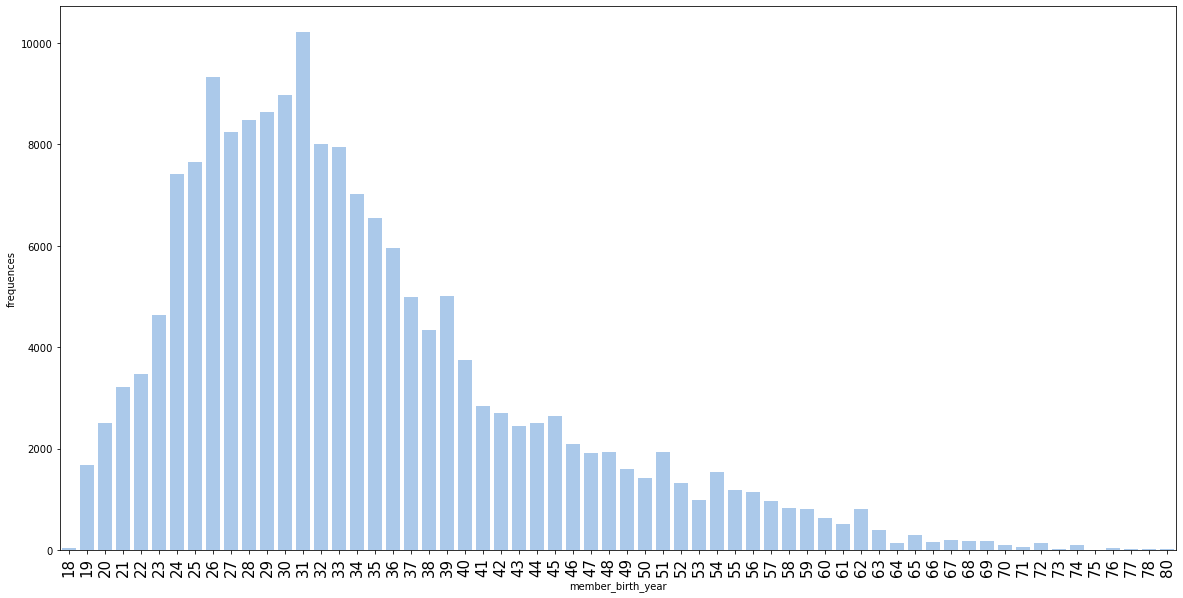

In [29]:
member_birth_year_count = ford_go_bike.member_birth_year.value_counts()
member_birth_year_count.index = getUserAges(member_birth_year_count.index)
print("ages :", member_birth_year_count.index )

# Plot
plt.figure(figsize=[20, 10])
sb.barplot(member_birth_year_count.index.values, member_birth_year_count, color=base_color)
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('frequences')
plt.xlabel('member_birth_year');

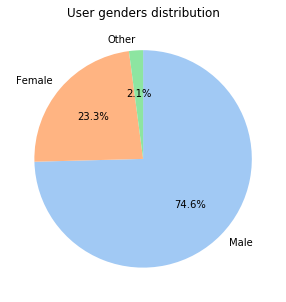

In [30]:
member_gender_count = ford_go_bike.member_gender.value_counts()
plt.figure(figsize=[10, 5])
plt.pie(member_gender_count, labels = member_gender_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.title('User genders distribution');

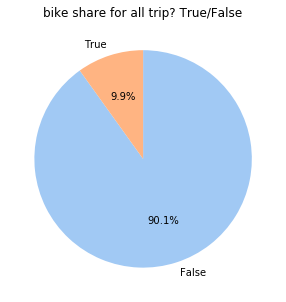

In [31]:
bike_share_for_all_trip_count = ford_go_bike.bike_share_for_all_trip.value_counts()
plt.figure(figsize=[10, 5])
plt.pie(bike_share_for_all_trip_count, labels = bike_share_for_all_trip_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('bike share for all trip? True/False');

Environ 90% de vélos utilisés ne sont pas en libre-service pour tous les trajets, et environ 10% le sont.

Après avoir réalisé les opérations de visualisations univariées de données, nous allons répondre aux questions suivantes :

### Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?

> Oui, avec la colonne `member_birth_year` qui donne un âge parfois même supérieur à 100 après des calculs.

### Parmi les caractéristiques que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour les mettre en ordre, les ajuster ou modifier leur forme ? Si oui, pourquoi l'avez-vous fait ?

> Oui, nous avons rémarqué que certaines personnes ont donné un âge dépassant même les 100 ans.
> Nous avons alors méné des recherches sur ce point et ayons conclu de retenir l'âge maximum étant de 80 ans.
>Nous avons créé une colonnes `user_age` qui contient l'âge du cycliste, en faisant **2019 - member_birth_year**.
>
>**2019** étant l'année où les courses ont été réalisées.

Oui, avec la colonne member_birth_year qui donne un âge parfois même supérieur à 100 après des calculs.

## Bivariate Exploration

Dans cette section nous étudions les relations entre les paires de variables de nos données, lesquelles nous avons présentées d'une manière ou d'une autre dans la section précédente (exploration univariée).

Quelle est l'influence qu'ont les jours du mois par rapport aux durées des courses ?

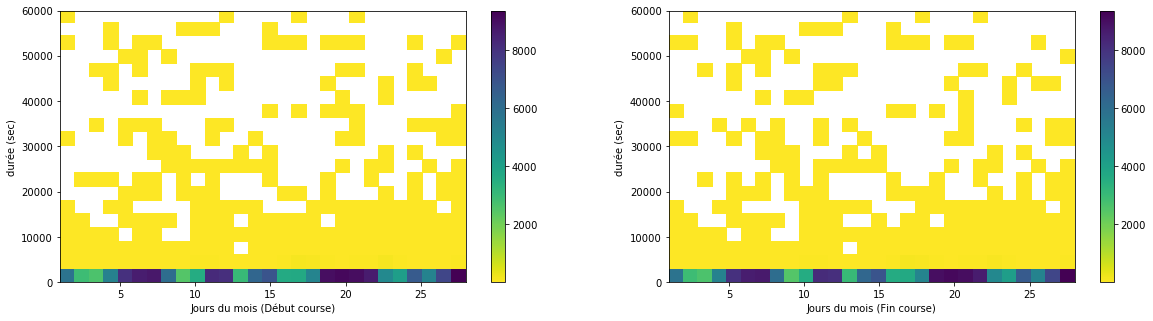

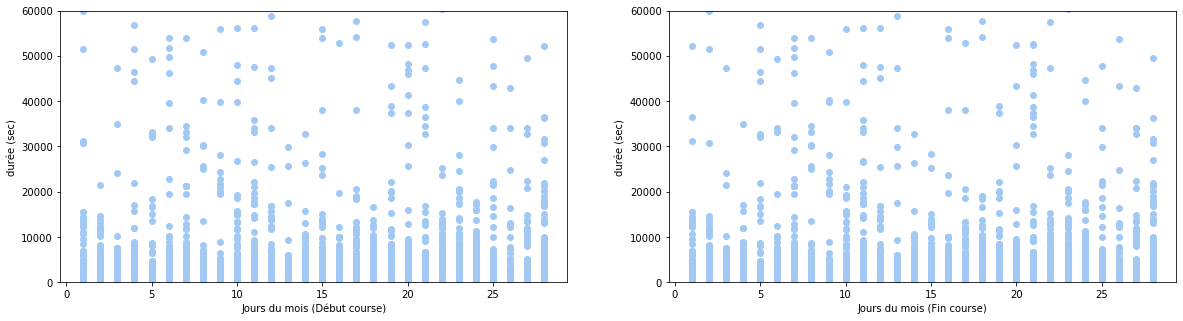

In [32]:
plt.figure(figsize=[20, 5])

# First plot : heatmap
plt.subplot(1, 2, 1)
plt.hist2d(data = ford_go_bike, x = 'start_day', y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins=28)
plt.colorbar()
plt.ylim([0, 60000]);
plt.xlabel('Jours du mois (Début course)')
plt.ylabel('durée (sec)'); 

plt.subplot(1, 2, 2)
plt.hist2d(data = ford_go_bike, x = 'end_day', y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins=28)
plt.colorbar()
plt.ylim([0, 60000]);
plt.xlabel('Jours du mois (Fin course)')
plt.ylabel('durée (sec)'); 

# Second plot : scatter
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
plt.scatter(data = ford_go_bike, x = 'start_day', y = 'duration_sec')
plt.ylim([0, 60000]);
plt.xlabel('Jours du mois (Début course)')
plt.ylabel('durée (sec)')

plt.subplot(1, 2, 2)
plt.scatter(data = ford_go_bike, x = 'end_day', y = 'duration_sec')
plt.ylim([0, 60000]);
plt.xlabel('Jours du mois (Fin course)')
plt.ylabel('durée (sec)'); 

Ces distributions nous montrent que les jours du mois n'ont pas d'influence directe sur les durées de nos courses, car les valeurs sont inconstantes, varient d'un jour à un autre de manière inconstante.

La deuxième relaton à analyser concerne les jours de la semaine par rapport à la durée des courses.

In [33]:
# Description of the races in relation to the days (start_day) of the week
mean_duration_by_start_weekday = ford_go_bike.groupby(['start_weekday'], as_index=True)['duration_sec'].describe()
mean_duration_by_start_weekday

,count,mean,std,min,25%,50%,75%,max
start_weekday,,,,,,,,
Friday,27621.0,681.616777,1458.774071,61.0,330.00,511.0,784.0,74408.0
Monday,25588.0,697.765437,1692.166505,61.0,319.00,504.0,773.0,83407.0
Saturday,14410.0,849.903331,2298.755226,62.0,325.00,539.0,897.0,84548.0
Sunday,14492.0,859.453354,2041.641746,61.0,316.75,535.0,908.0,73930.0
Thursday,33691.0,678.472767,1471.215179,61.0,325.00,512.0,782.0,82512.0
Tuesday,30562.0,652.877266,1374.828121,61.0,321.00,502.5,763.0,79548.0
Wednesday,28396.0,665.228412,1588.858374,61.0,321.00,503.0,760.0,83195.0


In [34]:
# Description of the races in relation to the days (end_day) of the week
mean_duration_by_start_weekday = ford_go_bike.groupby(['start_weekday'], as_index=True)['duration_sec'].describe()
mean_duration_by_start_weekday

,count,mean,std,min,25%,50%,75%,max
start_weekday,,,,,,,,
Friday,27621.0,681.616777,1458.774071,61.0,330.00,511.0,784.0,74408.0
Monday,25588.0,697.765437,1692.166505,61.0,319.00,504.0,773.0,83407.0
Saturday,14410.0,849.903331,2298.755226,62.0,325.00,539.0,897.0,84548.0
Sunday,14492.0,859.453354,2041.641746,61.0,316.75,535.0,908.0,73930.0
Thursday,33691.0,678.472767,1471.215179,61.0,325.00,512.0,782.0,82512.0
Tuesday,30562.0,652.877266,1374.828121,61.0,321.00,502.5,763.0,79548.0
Wednesday,28396.0,665.228412,1588.858374,61.0,321.00,503.0,760.0,83195.0


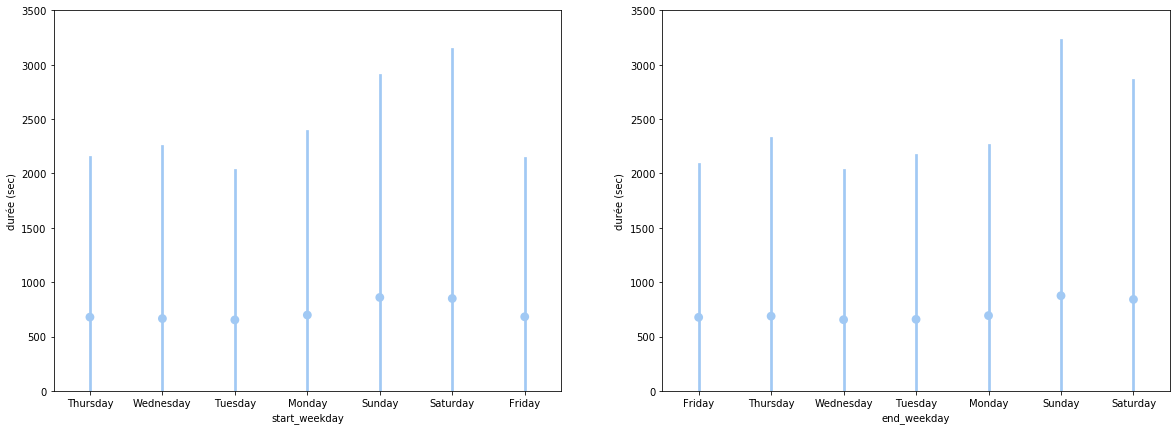

In [35]:
# Plot
plt.figure(figsize=[20, 7])

# First subplot
plt.subplot(1, 2, 1)
sb.pointplot(data=ford_go_bike, y='duration_sec', x='start_weekday', color=base_color, ci='sd', linestyles="")
plt.ylim([0, 3500])
plt.ylabel('durée (sec)')

# Second subplot
plt.subplot(1, 2, 2);
sb.pointplot(data=ford_go_bike, y='duration_sec', x='end_weekday', color=base_color, ci='sd', linestyles="")
plt.ylim([0, 3500])
plt.ylabel('durée (sec)');

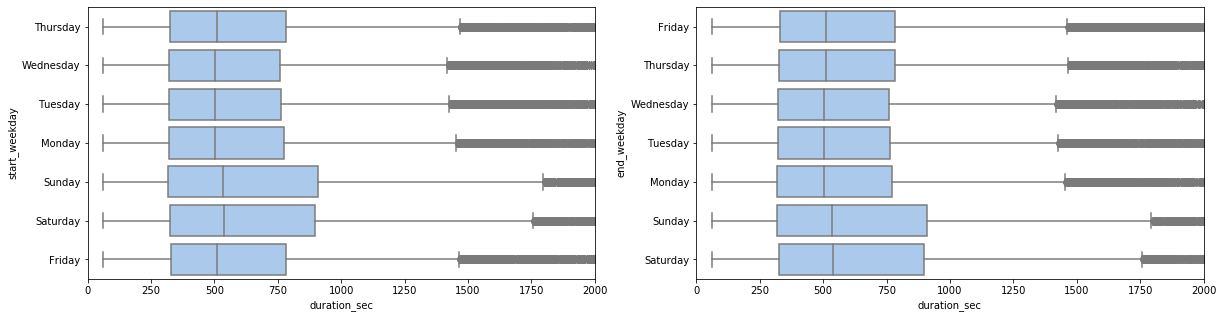

In [36]:
plt.figure(figsize=[20, 5])

# First subplot(Start_day)
plt.subplot(1, 2, 1)
sb.boxplot(data=ford_go_bike, y='start_weekday', x='duration_sec', color=base_color)
plt.xlim([0, 2000]);

# Second subplot(end_day)
plt.subplot(1, 2, 2)
sb.boxplot(data=ford_go_bike, y='end_weekday', x='duration_sec', color=base_color)
plt.xlim([0, 2000]);

>Bien qu'au niveau des explorations univariées réalisées en amont, qui ont montré que moins des courses étaient effectuées durant les weekend, les explorations bivariées nous montrent un phénomène tout autre :
>
>Que ça soit pour les jours de début, comme pour les jours de fin de course, nous voyons que les courses les plus longues sont effectuées pendants les weekend, entre samedi et dimanche, telles que nos diagramme ci-dessus nous le présentent.

Evaluation de la durée de courses par rapport aux heures de la journée


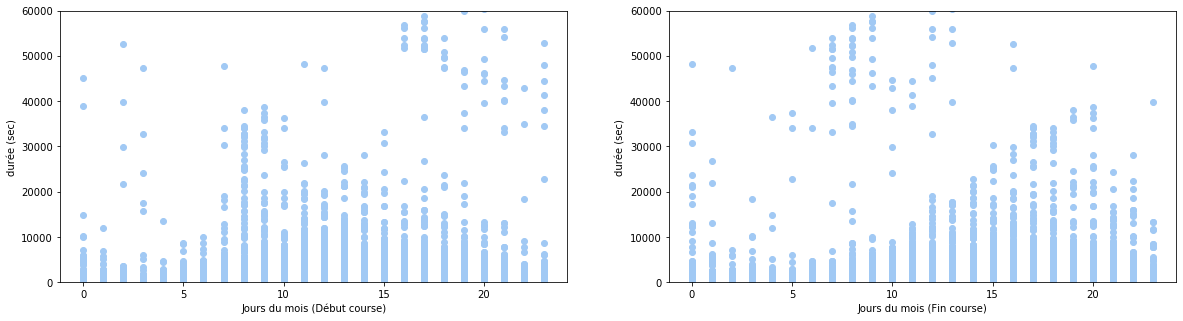

In [37]:
# Second plot : scatter
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
plt.scatter(data = ford_go_bike, x = 'start_hour', y = 'duration_sec')
plt.ylim([0, 60000])
plt.xlabel('Jours du mois (Début course)')
plt.ylabel('durée (sec)');

plt.subplot(1, 2, 2)
plt.scatter(data = ford_go_bike, x = 'end_hour', y = 'duration_sec')
plt.ylim([0, 60000]);
plt.xlabel('Jours du mois (Fin course)')
plt.ylabel('durée (sec)');

>Le constat est que les courses les plus longues sont réalisées le matin(7 heures à 9 heures) et le soir(16 heures à 18 heures).


Evaluation de la durée de courses par rapport aux types d'utilisateurs


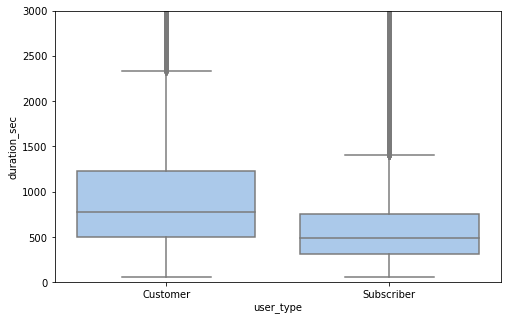

In [38]:
plt.figure(figsize=[8, 5])
sb.boxplot(data=ford_go_bike, x='user_type', y='duration_sec', color=base_color);
plt.ylim([0, 3000]);

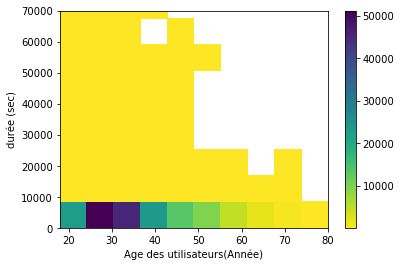

In [39]:
# Plot the heatmap
plt.hist2d(data = ford_go_bike, x = 'user_age', y = 'duration_sec', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.ylim([0, 70000]);
plt.xlabel('Age des utilisateurs(Année)')
plt.ylabel('durée (sec)'); 

>Nous constatons que les courses les plus longues sont réalisées par les utilisateurs dont l'âge varie entre 25 et 35 ans.

Evaluation de la durée de courses par rapport aux genres(sexes) des utilisateurs

In [40]:
# Description of the races duration in relation to the member_gender
mean_duration_by_start_weekday = ford_go_bike.groupby(['member_gender'], as_index=True)['duration_sec'].describe()
mean_duration_by_start_weekday

,count,mean,std,min,25%,50%,75%,max
member_gender,,,,,,,,
Female,40771.0,779.101641,1787.720125,61.0,361.0,568.0,864.0,83195.0
Male,130345.0,672.716752,1505.593860,61.0,312.0,493.0,762.0,84548.0
Other,3644.0,997.566685,3527.686499,63.0,344.0,555.0,875.0,82512.0


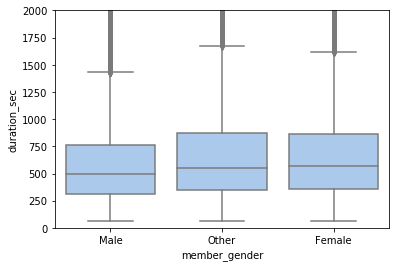

In [41]:
sb.boxplot(data=ford_go_bike, x='member_gender', y='duration_sec', color=base_color);
plt.ylim([0, 2000]);

>Presque tous les âges sont dominés par les hommes, suivi des femmes et des autres.

Etudions maintenant la relation entre le type de vélos et l'age des utilisateurs

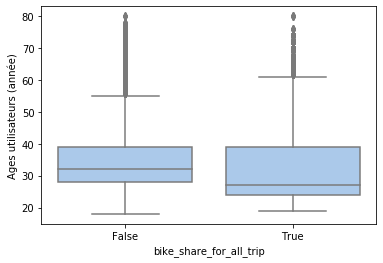

In [42]:
sb.boxplot(data=ford_go_bike, x='bike_share_for_all_trip', y='user_age', color=base_color)
plt.ylabel('Ages utilisateurs (année)');

>Les utilisateurs les plus âgés préfèrent des vélos pour tous types de trajets par rapport aux jeunes qui aiment des vélos qui ne sont pas de tous types.

Etudions maintenant la relation entre les jours de la semaine et l'age des utilisateurs

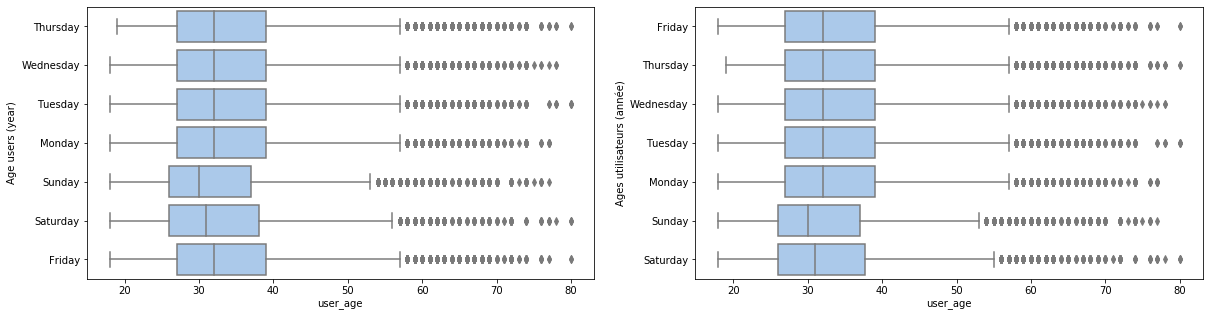

In [43]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data=ford_go_bike, y='start_weekday', x='user_age', color=base_color)
plt.ylabel('Age users (year)');

plt.subplot(1, 2, 2)
sb.boxplot(data=ford_go_bike, y='end_weekday', x='user_age', color=base_color)
plt.ylabel('Ages utilisateurs (année)');

Le constat est le même, les jours du weekend les vélos sont moins utilisés.

### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la caractéristique qui vous intéresse varie-elle avec les autres caractéristiques de l'ensemble de données ?

>Bien que les jours du weekend(Samedis et Dimanches) peu de courses sont réalisées, mais elles sont de longues durées.

### Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas avec la caractéristique principale) ?

>Nous avons remarqué que les utilisateurs les plus âges préfèrent des vélos pour tous types de trajets et aussi n'aiment pas vraiment avoir d'abonnement.


## Multivariate Exploration

Après avoir étudié les relations de façon paire entre les caractéristiques qui nous intéressent, nous passons maintenant à une autre dimension, celle d'analyse des relations qui peuvent exister entre 3, voire plus de ces caractéristiques.

Nous allons analyser comment les types d'utilisateurs et les âges des utilsteurs influencent la durée des courses

<Figure size 576x360 with 0 Axes>

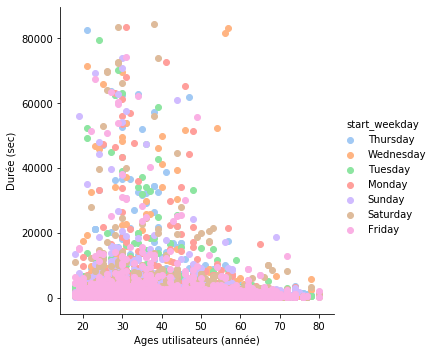

In [44]:
plt.figure(figsize=[8, 5]);

g = sb.FacetGrid(data = ford_go_bike, hue ='start_weekday' , size = 5);
g.map(plt.scatter, 'user_age','duration_sec' )
g.add_legend();
plt.xlabel('Ages utilisateurs (année)');
plt.ylabel('Durée (sec)');
plt.show();

Avec cette figure, nous avons du mal à interpréter les résultats.

Nous allons étudier dans quelle mesure les types de vélo et les âges des utilsteurs influencent la durée des courses

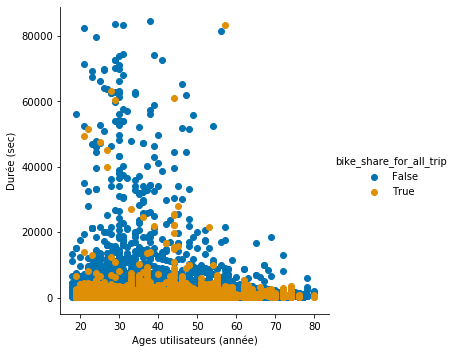

In [45]:
g = sb.FacetGrid(data = ford_go_bike, hue = 'bike_share_for_all_trip', size = 5,
palette = 'colorblind')
g.map(plt.scatter, 'user_age', 'duration_sec')
g.add_legend()
plt.xlabel('Ages utilisateurs (année)');
plt.ylabel('Durée (sec)');

>Cette graphique nous montre que presque la totalité de courses sont réalisées avec des vélos qui ne sont pas pour tous types de trajets, et aussi par les des utilisateurs dont les âges varient entre 25 et 45 ans.

Nous allons étudier aussi comment les types d'utilisateurs et leurs sexes influencent la durée des courses

Text(0.5, 0, 'genres/sexes utilisateurs')

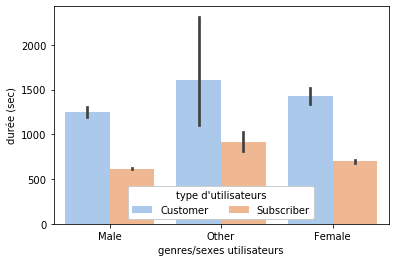

In [46]:
ax = sb.barplot(data = ford_go_bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = "type d'utilisateurs")
plt.ylabel('durée (sec)')
plt.xlabel('genres/sexes utilisateurs')

>Nous remarquons que parmi les utilisateurs, ce sont les abonnés(customer) qui réalisent plus de courses de longues durées que les clients(subscriber).
>
>Et aussi parmi ces deux type d'utilisateurs, ceux n'ayant pas précisé leur genre(sexe) réalisent plus de courses de longues durées, suivi des femmes et enfin les hommes.


### Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y avait-il des caractéristiques qui se renforçaient mutuellement pour ce qui est de l'observation de la ou des caractéristiques qui vous intéressent ?

> Oui, par exemple l'âge des utilisateurs et le type de vélo sont en corrélation.

### Y avait-il des interactions intéressantes ou surprenantes entre les caractéristiques ?

> Oui, par exemple lorsqu'on combine le type d'utilisateur et leurs sexes, nous avons été surpris de voir que les femmes réalisent des plus longues durées de courses que les hommes, et que ceux qui n'ont pas précisé leur genre dépassent tous les deux autres gneres.

## Conclusions

>Nous avons eu à étudier durant cette analyse les relations qui existent entre les autres caractéristiques et les durées de courses parcourues.
>
> Nous avons conclu que certaines caractéristiques influencent les durées des courses, telles que **le type d'utilisateur**, **les années de naissance des utilisateurs**, **le type de vélo**, **le genre d'utilisateurs**, **les jours semaine**, **les heures de la journées**.
>
>Par contre d'autres caractéristiques n'influencent pas les durées de courses, telle que **les jours du mois**

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1. Influence des jours de la semaine sur les durées des courses

Nous avons réparti les courses selon les jours de la semaine afin d'appréhender son comportement, et le résultat nous a donné un classement qui ressemble à ceci :

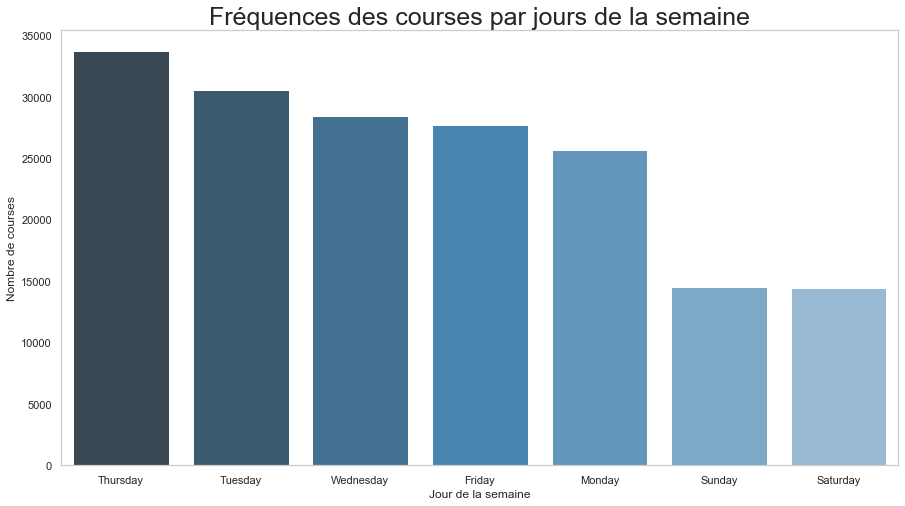

In [47]:
# Plot the distribution
plt.figure(figsize=[15, 8])

# Set color
sb.set(style="whitegrid", color_codes=True)
pal = sb.color_palette("Blues_d", 7)

colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
# sb.barplot(weekday_values.index.values, weekday_values, color=base_color, order=weekday_values_order)
sb.barplot(weekday_values.index.values, weekday_values, palette=np.array(pal[::-1]), order=weekday_values_order, )

# Selecting the axis-X making the bottom and top axes False.

plt.ylabel('Nombre de courses')
plt.xlabel('Jour de la semaine');
plt.grid(b=False)
plt.title('Fréquences des courses par jours de la semaine', fontsize=25);

Mais lorsque nous analysons les durées des courses en fonction des jours de la semaine nous obtenons le résultat suivant :

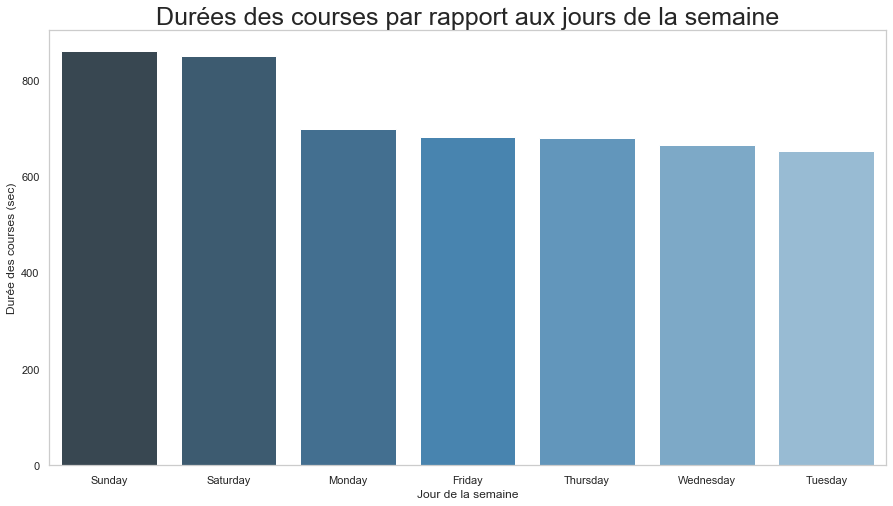

In [48]:
# Plot
plt.figure(figsize=[15, 8])

# Set color
sb.set(style="whitegrid", color_codes=True)
pal = sb.color_palette("Blues_d", 7)

durations_mean_values = ford_go_bike.groupby(['start_weekday'], as_index=False)['duration_sec'].mean()

durations_mean_values_sorted = durations_mean_values.sort_values('duration_sec', ascending=False)

sb.barplot(data=durations_mean_values_sorted, y='duration_sec', x='start_weekday', palette=np.array(pal[::-1]), color=base_color)
plt.ylabel('durée (sec)');

plt.ylabel('Durée des courses (sec)')
plt.xlabel('Jour de la semaine');
plt.grid(b=False)
plt.title('Durées des courses par rapport aux jours de la semaine', fontsize=25);

Nous sommes arrivés à la conclusion que même si moins de courses à vélo sont effectuées les jours de week ends, elles sont réalisées sur des longues durées que pour les autres jours de la semaine.

En d'autres termes, plus nous avons des week ends, plus on a des courses de longues durées, et moins on a des jours de week end, moins on a des courses de longues durées.

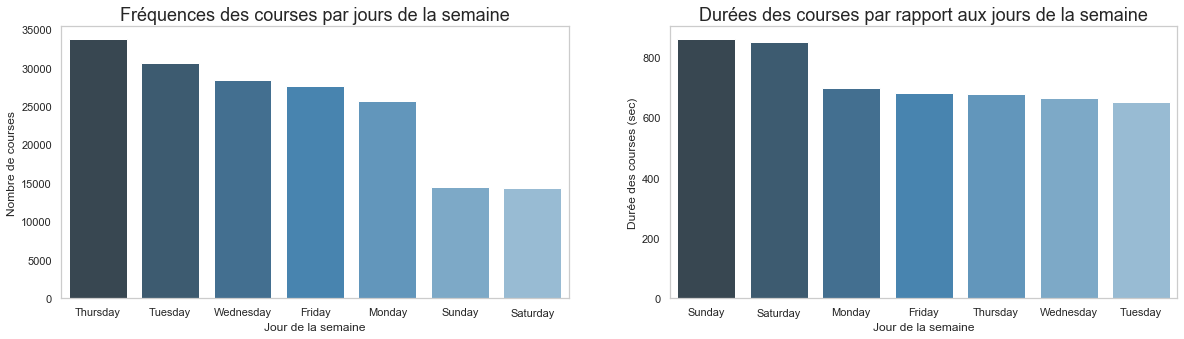

In [49]:
# Plot the distribution
plt.figure(figsize=[20, 5])

# Set color
sb.set(style="whitegrid", color_codes=True)
pal = sb.color_palette("Blues_d", 7)

# First subplot
plt.subplot(1, 2, 1)
sb.barplot(weekday_values.index.values, weekday_values, palette=np.array(pal[::-1]), order=weekday_values_order, )


plt.ylabel('Nombre de courses')
plt.xlabel('Jour de la semaine');
plt.grid(b=False)
plt.title('Fréquences des courses par jours de la semaine', fontsize=18);

# Second subplot
plt.subplot(1, 2, 2)
durations_mean_values = ford_go_bike.groupby(['start_weekday'], as_index=False)['duration_sec'].mean()

durations_mean_values_sorted = durations_mean_values.sort_values('duration_sec', ascending=False)

sb.barplot(data=durations_mean_values_sorted, y='duration_sec', x='start_weekday', palette=np.array(pal[::-1]), color=base_color)
plt.ylabel('durée (sec)');

plt.ylabel('Durée des courses (sec)')
plt.xlabel('Jour de la semaine');
plt.grid(b=False)
plt.title('Durées des courses par rapport aux jours de la semaine', fontsize=18);

## 2. Influence des durées des sources par les types de vélo et les âges des utilsteurs

Pour savoir qui réalisent plus des courses de longues durées et avec quel type de vélo, nous nous sommes aussi intéressés à l'âge des cyclistes et aux types de vélo qu'ils utilisent, et nous sommes arrivés aux résultat suivants :

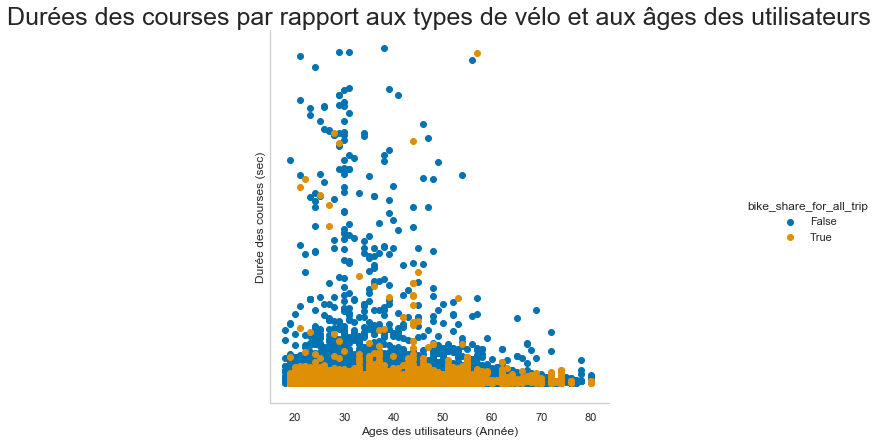

In [50]:
g = sb.FacetGrid(data = ford_go_bike, hue = 'bike_share_for_all_trip', size = 6, palette = 'colorblind');
g.map(plt.scatter, 'user_age', 'duration_sec');
g.add_legend();

# Selecting the axis-Y making the right and left axes False
plt.tick_params(axis='y', which='both', right=False,
                left=False, labelleft=False)
plt.ylabel('Durée des courses (sec)')
plt.xlabel('Ages des utilisateurs (Année)');
plt.grid(b=False);
plt.title('Durées des courses par rapport aux types de vélo et aux âges des utilisateurs', fontsize=25);

Ce graphique nous montre que presque la totalité de courses sont réalisées avec des vélos qui ne sont pas pour tous types de trajets, et aussi par des cyclistes dont les âges varient entre 25 et 45 ans.

Donc plus on avance en âge, plus les durées de courses diminuent, et plus on a des vélos qui ne sont pas pour tous types de travaux, plus on effectue des courses de longues durées.

## 3. Influence des durées des courses par les types de cyclistes et leurs sexes



Notre désire est de voir plus de gens utiliser les moyens de déplacement plus responsables et écologiques tant que possible.<br>
Sur ce, nous avons besoin de savoir l'influence qu'ont les types de cyclistes et le sexe sur la durée des courses afin de mener une campagne spécifique sur l'usage des vélos dans notre quotidien.<br>
Et nos analyses nous montrent ce qui suit :

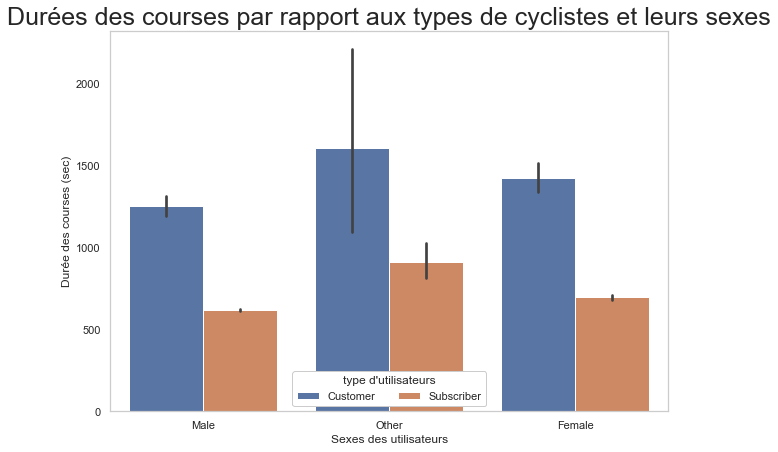

In [51]:
plt.figure(figsize=[10, 7]);
ax = sb.barplot(data = ford_go_bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = "type d'utilisateurs")
plt.ylabel('durée des courses (sec)')
plt.xlabel('genres des utilisateurs')

#plt.tick_params(axis='y', which='both', right=False,
#                left=False, labelleft=False)
plt.ylabel('Durée des courses (sec)')
plt.xlabel('Sexes des utilisateurs');
plt.grid(b=False);
plt.title('Durées des courses par rapport aux types de cyclistes et leurs sexes', fontsize=25);

Nous remarquons que parmi les utilisateurs, ce sont les abonnés(customer) qui réalisent plus de courses de longues durées que les clients(subscriber).
Et aussi parmi ces deux type d'utilisateurs, ceux n'ayant pas précisé leur genre(sexe) réalisent plus de courses de longues durées, suivi des femmes et enfin les hommes.

## Conclusion

Après avoir réalisé cette analyse, nous avons compris que plusieurs caractéristiques entre en jeu et influencent les durées de courses, notamment les **jours de la semaine**, l'**âge des utilisateurs**, le **type de vélo**, les **sexes d'utilisateurs**, les **types d'utilisateur**

Notre rôle est alors de mener une politique stratégique en se servant de ces éléments afin d'inciter la population à réaliser plus de courses de longues durées, ce qui est responsable, écologique et peu coûteux, bénéfique pour chaque partie.

## Références

><ul>
    <li>
        <a href='https://citibikenyc.com/'>CityBike</a>
    </li>
    <li>
        <a href='https://pandas.pydata.org/docs/'>Pandas documentation</a>
    </li>
    <li>
        <a href='https://numpy.org/doc/stable/'>NumPy documentation</a>
    </li>
    <li>
        <a href='https://seaborn.pydata.org/'>Seaborn documentation</a>
    </li>
    <li>
        <a href='https://matplotlib.org/stable/index.html'>Matplotlib documentation</a>
    </li>
    <li>
        <a href='https://medium.com/my-data-camp-journey/investigating-tmdb-movie-datasets-4ee04c263915'>Investigating TMDB Movie Datasets</a>
    </li>
    <li>
        <a href='https://stackoverflow.com/questions/55001289/pandas-groupby-based-on-matching-substring-in-pandas-column'>Stackoverflow - Groupby based on matching substring in pandas column</a>
    </li>
    <li>
        <a href='https://openclassrooms.com/fr/courses/7771531-decouvrez-les-librairies-python-pour-la-data-science/7858361-personnalisez-vos-graphiques-avec-matplotlib'>Personnalisez vos graphiques avec Matplotlib</a>
    </li>
</ul>
